# 시계열 데이터 분석
- 시계열 데이터 분석은 설명이 목적일 수도 있고 예측이 목적일 수도 있음
  - 당연히 예측하는게 목적이 아니냐하는데, 어떤 분석 기법을 쓰느냐에 따라 설명하기에 적합할수가 있고, 예측하기에 적합할 수가 있는 것
- 예측 분석기법 => regression model or smoothing 
- 시계열 데이터는 4개의 구성요소로 나누어볼 수 있음 => 경향(trend), 계절(seasonality), 순환(Cycle), 잡음(noise)



        Month  Ridership
0  01/01/1991   1708.917
1  01/02/1991   1620.586
2  01/03/1991   1972.715
3  01/04/1991   1811.665
4  01/05/1991   1974.964
        Month  Ridership       Date
0  01/01/1991   1708.917 1991-01-01
1  01/02/1991   1620.586 1991-02-01
2  01/03/1991   1972.715 1991-03-01
3  01/04/1991   1811.665 1991-04-01
4  01/05/1991   1974.964 1991-05-01
<class 'pandas.core.series.Series'>


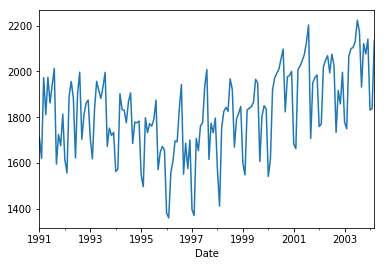

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools

df = pd.read_csv('./data/amtrak.csv')
print(df.head())

# Date 필드 추가(datetime객체로 들어가는 듯)
df['Date'] = pd.to_datetime(df['Month'], format='%d/%m/%Y')

print(df.head())

series_ts = pd.Series(df['Ridership'].values, index = df['Date'], name='Ridership')
print(type(series_ts))

series_ts.index = pd.DatetimeIndex(series_ts.index, freq = series_ts.index.inferred_freq)

# plot
ax = series_ts.plot()



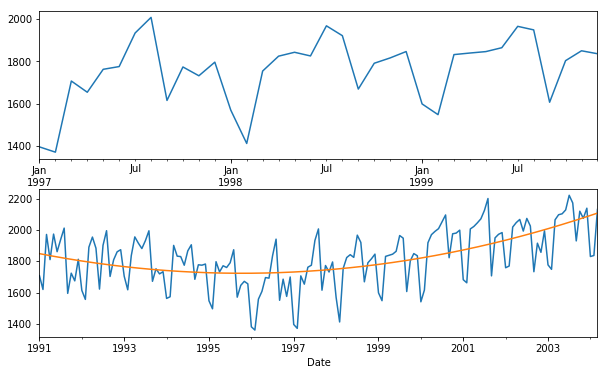

In [3]:
ts_3yrs = series_ts['1997':'1999']
ts_3yrs.head()

df3 = tsatools.add_trend(series_ts, trend='ctt')
ts_lm = sm.ols(
    formula = 'Ridership ~ trend + trend_squared'
    , data = df3
).fit()

ts_lm

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(10, 6))

ts_3yrs.plot(ax = axes[0])
series_ts.plot(ax = axes[1])

# 예측한 결과 데이터를 1번 그림에다가 그려 넣기
ts_lm.predict(df3).plot(ax = axes[1])


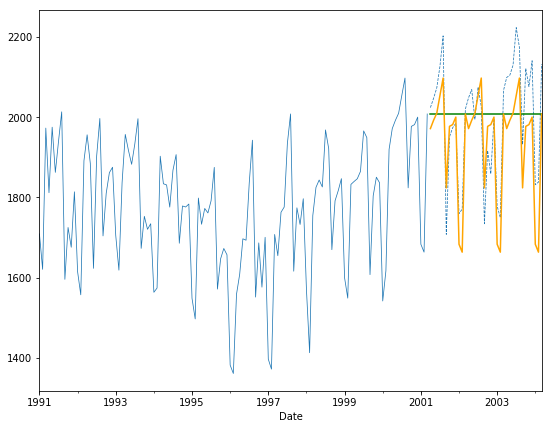

In [4]:
nValid = 36
nTrain = len(series_ts) - nValid

# partition the data
train_ts = series_ts[:nTrain]
valid_ts = series_ts[nTrain:]

# generate the naive and seasonal naive forecast
naive_pred = pd.Series(train_ts[-1], index = valid_ts.index)
last_season = train_ts[-12:]
seasonal_pred = pd.Series(
    pd.concat([last_season]*5)[:len(valid_ts)].values
    , index = valid_ts.index
)

# plot forecasts and actual in the training and validation sets
# 같은 도화지에 훈련 데이터셋 그리고
ax = train_ts.plot(color = 'C0', linewidth = 0.75, figsize = (9,7))
# 같은 도화지에 테스트 데이터셋 그리고
valid_ts.plot(ax = ax, color = 'C0', linestyle = 'dashed', linewidth = 0.75)

naive_pred.plot(ax = ax, color = 'green')
seasonal_pred.plot(ax = ax, color = 'orange')

# determine coordinates for drawing the arrows and lines
one_month = pd.Timedelta('31 days')
xtrain = (min(train_ts.index), max(train_ts.index) - one_month)
xvalid = (min(valid_ts.index) + one_month, max(valid_ts.index) - one_month)
xfuture = (max(valid_ts.index) + one_month, '2006')

xtv = xtrain[1] + 0.5 * (xvalid[0] - xtrain[1])
xvf = xtrain[1] + 0.5 * (xfuture[0] - xvalid[1])

ax.add_line(plt.Line2D(xtrain, (2450, 2450), color = 'black', linewidth = 0.5))
ax.add_line(plt.Line2D(xvalid, (2450, 2450), color = 'black', linewidth = 0.5))
ax.add_line(plt.Line2D(xfuture, (2450, 2450), color = 'black', linewidth = 0.5))




In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools

df = pd.read_csv('./data/amtrak.csv')
print(df.head())

# Date 형식 추가
df['Date'] = pd.to_datetime(df['Month'], format = '%d/%m/%Y')
print(df.head())

# 기반 데이터셋에서 ridership과 시간만 추출해서 시계열 데이터 준비
ridership_ts = pd.Series(
    df['Ridership'].values
    , index = df['Date']
)
print(ridership_ts.head())

df2 = tsatools.add_trend(ridership_ts, trend = 'ct')
print(df2.head())

model = sm.ols(
    formula = 'Ridership ~ trend'
    , data = df2
).fit()



        Month  Ridership
0  01/01/1991   1708.917
1  01/02/1991   1620.586
2  01/03/1991   1972.715
3  01/04/1991   1811.665
4  01/05/1991   1974.964
        Month  Ridership       Date
0  01/01/1991   1708.917 1991-01-01
1  01/02/1991   1620.586 1991-02-01
2  01/03/1991   1972.715 1991-03-01
3  01/04/1991   1811.665 1991-04-01
4  01/05/1991   1974.964 1991-05-01
Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
dtype: float64
                   0  const  trend
Date                              
1991-01-01  1708.917    1.0    1.0
1991-02-01  1620.586    1.0    2.0
1991-03-01  1972.715    1.0    3.0
1991-04-01  1811.665    1.0    4.0
1991-05-01  1974.964    1.0    5.0


PatsyError: Error evaluating factor: NameError: name 'Ridership' is not defined
    Ridership ~ trend
    ^^^^^^^^^